**K-Nearest Neighbors (KNN) is a supervised, non-parametric, and instance-based (lazy learning) machine learning algorithm.
It is used for classification and regression problems.**

# Core Idea of KNN

**A data point is classified or predicted based on the K closest data points in the training dataset.**

Classification → Majority voting

Regression → Average of neighbors’ values

# How KNN Works

1.Choose the value of K

2.Calculate the distance between the new data point and all training points

3.Select the K nearest neighbors

4.Make a prediction:

Classification → Most common class

Regression → Mean of target values

# Distance Metrics in Machine Learning

**Distance metrics measure how similar or dissimilar two data points are.
They are the foundation of algorithms like KNN, K-Means, DBSCAN, Hierarchical Clustering, etc.**

## Why Distance Metrics Matter

**Machine learning models don’t understand meaning — only numbers.
Distance metrics help answer:**

“How close are two observations?”

Wrong metric  → wrong neighbors → wrong prediction

**1.Euclidean Distance (Most Common)**

Straight-line (as-the-crow-flies) distance

Points: (2,3) and (5,7)

In [1]:
import numpy as np

In [2]:
np.sqrt((2-5)**2+(3-7)**2)

np.float64(5.0)

Use When

1.Continuous numeric data

2.Features on similar scale

**Sensitive to outliers**

**2.Manhattan Distance (City Block Distance)**

Distance traveled on grid roads (no diagonals)

In [3]:
abs(2-5)+abs(3-7)

7

Use When

1.Grid-like data

2.Robust to outliers

**3.Minkowski Distance (Generalized Distance)**

$$
d(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
$$


| p value | Distance  |
| ------- | --------- |
| p = 1   | Manhattan |
| p = 2   | Euclidean |
| p → ∞   | Chebyshev |


**KNN for Classification (Example)**

Problem: Email → Spam or Not Spam

K = 5

3 neighbors → Spam

2 neighbors → Not Spam

Prediction: Spam

**KNN for Regression (Example)**

Problem: Predict house price 

K = 3

Neighbor prices:

₹50L

₹55L

₹60L

Prediction = (50 + 55 + 60) / 3 = ₹55L

## Choosing the Value of K

| K Value       | Effect                            |
| ------------- | --------------------------------- |
| Small K (1–3) | High variance, sensitive to noise |
| Large K       | High bias, smoother boundary      |
| Odd K         | Avoids tie in classification      |


Best Practice: Use cross-validation to choose optimal K

**Feature Scaling Is Mandatory**

KNN is distance-based → scaling is crucial

Use:

Standardization (Z-score)

Min-Max Scaling

Without scaling → biased distance calculations

**Advantages of KNN**

✔ Simple & intuitive
✔ No training phase
✔ Handles multi-class problems naturally
✔ Works well with small datasets

**Disadvantages of KNN**

❌ Slow for large datasets
❌ High memory usage
❌ Sensitive to noise & outliers
❌ Feature scaling required

**When to Use KNN**

✅ Small to medium datasets
✅ Low-dimensional data
✅ Benchmarking / baseline model
❌ Very large or high-dimensional datasets

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load data
X, y = load_iris(return_X_y=True)

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prediction
print(knn.predict(X_test))


[1 1 0 2 2 2 2 2 2 2 1 0 0 2 2 1 1 1 2 0 1 0 2 2 0 1 0 2 2 0]


Dataset shape: (891, 12)

First few rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0     

C:\Users\hp\AppData\Local\Temp\ipykernel_9664\3933729871.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_9664\3933729871.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

k= 3: CV Accuracy = 0.8062
k= 4: CV Accuracy = 0.8020
k= 5: CV Accuracy = 0.8076
k= 6: CV Accuracy = 0.8133
k= 7: CV Accuracy = 0.8146
k= 8: CV Accuracy = 0.8217
k= 9: CV Accuracy = 0.8217
k=10: CV Accuracy = 0.8147
k=11: CV Accuracy = 0.8161
k=12: CV Accuracy = 0.8147
k=13: CV Accuracy = 0.8105
k=14: CV Accuracy = 0.8133
k=15: CV Accuracy = 0.8062
k=16: CV Accuracy = 0.8133
k=17: CV Accuracy = 0.8105
k=18: CV Accuracy = 0.8119
k=19: CV Accuracy = 0.8020
k=20: CV Accuracy = 0.8091
k=21: CV Accuracy = 0.8076
k=22: CV Accuracy = 0.8119
k=23: CV Accuracy = 0.8104
k=24: CV Accuracy = 0.8133
k=25: CV Accuracy = 0.8090
k=26: CV Accuracy = 0.8118
k=27: CV Accuracy = 0.8118
k=28: CV Accuracy = 0.8133
k=29: CV Accuracy = 0.8118
k=30: CV Accuracy = 0.8090


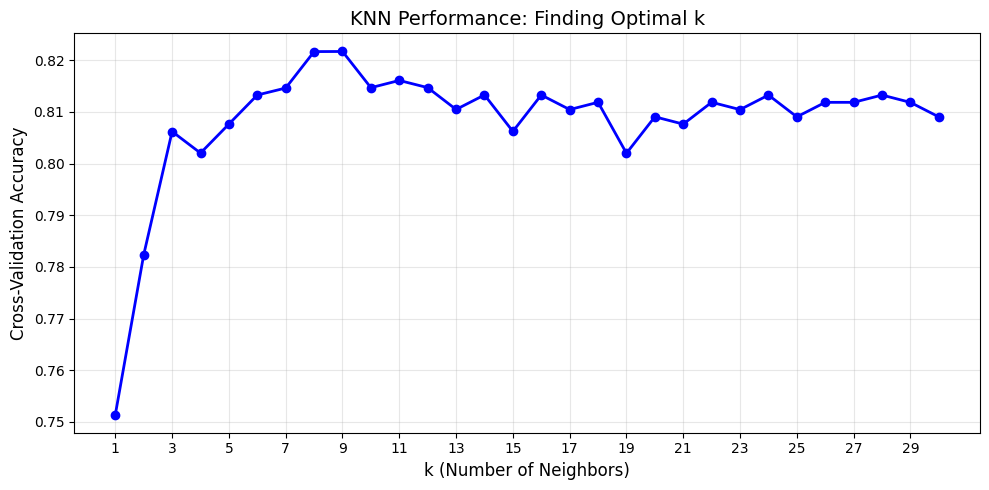


Optimal k: 9 with CV accuracy: 0.8217

MODEL EVALUATION

Training Set Performance:
  Accuracy:  0.8441
  Precision: 0.8432
  Recall:    0.7289
  F1-Score:  0.7819

Test Set Performance:
  Accuracy:  0.8045
  Precision: 0.7931
  Recall:    0.6667
  F1-Score:  0.7244

Confusion Matrix (Test Set):
[[98 12]
 [23 46]]


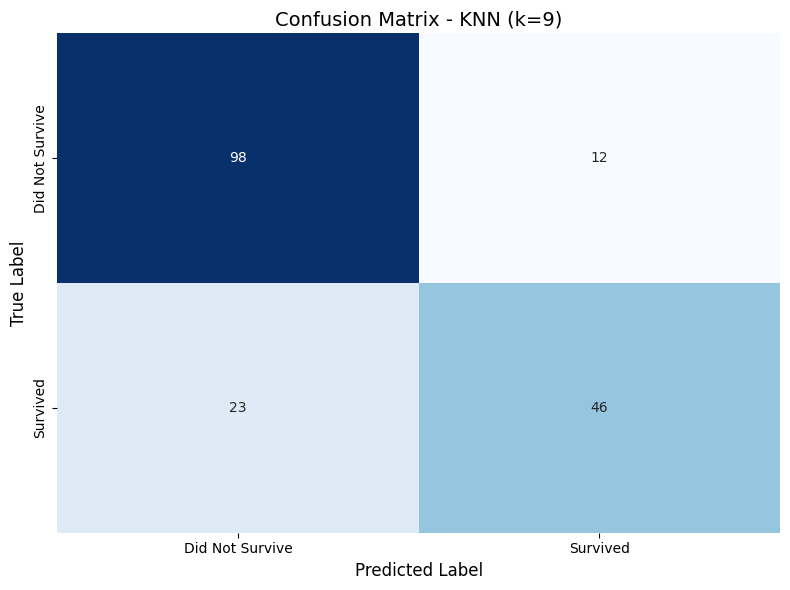


Classification Report:
                 precision    recall  f1-score   support

Did Not Survive       0.81      0.89      0.85       110
       Survived       0.79      0.67      0.72        69

       accuracy                           0.80       179
      macro avg       0.80      0.78      0.79       179
   weighted avg       0.80      0.80      0.80       179


EXAMPLE PREDICTIONS

Passenger Details and Predictions:

Passenger 1:
  Class=1, Sex=0, Age=25
  Prediction: Survived
  Confidence: 88.89%

Passenger 2:
  Class=3, Sex=1, Age=35
  Prediction: Did Not Survive
  Confidence: 77.78%

Passenger 3:
  Class=2, Sex=1, Age=40
  Prediction: Did Not Survive
  Confidence: 77.78%

MODEL SUMMARY
Algorithm: k-Nearest Neighbors (KNN)
Optimal k: 9
Test Accuracy: 0.8045
Number of training samples: 712
Number of features: 7
Features used: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset

df = pd.read_excel('Titanic.xlsx')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())

# Data Preprocessing
# Drop irrelevant columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

print("\nProcessed data:")
print(df.head())

# Prepare features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

print("\nFeatures:", X.columns.tolist())
print("Target distribution:")
print(y.value_counts())
print(f"Survival rate: {y.mean():.2%}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Feature Scaling (crucial for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find optimal k using cross-validation
k_values = range(1, 31)
cv_scores = []

print("\nFinding optimal k...")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"k={k:2d}: CV Accuracy = {scores.mean():.4f}")

# Plot cross-validation scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, cv_scores, 'bo-', linewidth=2, markersize=6)
plt.xlabel('k (Number of Neighbors)', fontsize=12)
plt.ylabel('Cross-Validation Accuracy', fontsize=12)
plt.title('KNN Performance: Finding Optimal k', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 31, 2))
plt.tight_layout()
plt.savefig('knn_cv_scores.png', dpi=300, bbox_inches='tight')
plt.show()

# Select optimal k
optimal_k = k_values[np.argmax(cv_scores)]
print(f"\nOptimal k: {optimal_k} with CV accuracy: {max(cv_scores):.4f}")

# Train final model with optimal k
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = knn_model.predict(X_train_scaled)
y_test_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

print("\nTraining Set Performance:")
print(f"  Accuracy:  {accuracy_score(y_train, y_train_pred):.4f}")
print(f"  Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"  Recall:    {recall_score(y_train, y_train_pred):.4f}")
print(f"  F1-Score:  {f1_score(y_train, y_train_pred):.4f}")

print("\nTest Set Performance:")
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall:    {test_recall:.4f}")
print(f"  F1-Score:  {test_f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Set):")
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
plt.title(f'Confusion Matrix - KNN (k={optimal_k})', fontsize=14)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, 
      target_names=['Did Not Survive', 'Survived']))

# Example Prediction
print("\n" + "="*50)
print("EXAMPLE PREDICTIONS")
print("="*50)

# Create example passengers
examples = pd.DataFrame({
    'Pclass': [1, 3, 2],
    'Sex': [0, 1, 1],  # 0=female, 1=male
    'Age': [25, 35, 40],
    'SibSp': [1, 0, 0],
    'Parch': [0, 0, 1],
    'Fare': [512, 8, 21],
    'Embarked': [0, 2, 1]
})

examples_scaled = scaler.transform(examples)
predictions = knn_model.predict(examples_scaled)
probabilities = knn_model.predict_proba(examples_scaled)

print("\nPassenger Details and Predictions:")
for i, pred in enumerate(predictions):
    status = "Survived" if pred == 1 else "Did Not Survive"
    prob_not_survive = probabilities[i][0]
    prob_survive = probabilities[i][1]
    print(f"\nPassenger {i+1}:")
    print(f"  Class={examples.iloc[i]['Pclass']}, Sex={examples.iloc[i]['Sex']}, Age={examples.iloc[i]['Age']}")
    print(f"  Prediction: {status}")
    print(f"  Confidence: {max(prob_not_survive, prob_survive):.2%}")

print("\n" + "="*50)
print("MODEL SUMMARY")
print("="*50)
print(f"Algorithm: k-Nearest Neighbors (KNN)")
print(f"Optimal k: {optimal_k}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print(f"Features used: {X.columns.tolist()}")